In [1]:
# define universe
portfolio_dict = dict()

#p_name = 'Pairs trading study (down-zigzag)'
#p_name = 'Pairs trading study (stay-zigzag)'
p_name = 'Pairs trading study (up-zigzag)'

pair = ['Pair A', 'Pair B']
base_date = '2017-08-01'

# trading strategy determinants
threshold = 0.02   # percent

path = './data/'

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import finterstellar as fs

ld = fs.LoadData()

prices_df = ld.read_raw_csv(path, p_name)

trd = fs.PairTrade()

base_date = trd.check_base_date(prices_df, base_date)
sample = trd.sampling(prices_df, base_date, pair)
regr = trd.regression(sample, pair)
sample = trd.expected_y(sample, regr, pair)
book = trd.create_trade_book(sample, pair)
book = trd.tradings(sample, book, threshold, pair, short=True)
book = trd.position(book, pair)
fund_rtn = trd.returns_log(book, pair)
bm_rtn = trd.benchmark_return_log(book, pair)
exs_rtn = trd.excess_return_log(fund_rtn, bm_rtn)

last_date = sample.index[-1].date().strftime('%Y-%m-%d')
trading_strategy = trd.trading_strategy(sample, threshold, pair, last_date)
position_strategy = trd.position_strategy(book, pair, last_date)

Accunulated return : 37.01 %
BM return: 151.33 %
{'Pair A': 151.2451, 'Pair B': 151.4081}
Excess return: -114.32 %
As of 2017-12-31 this model suggests you to buy Pair A & clear Pair B
As of 2017-12-31 your model portfolio ['Pair A', 'Pair B'] needs to be composed of long Pair Ashort Pair B


In [3]:
v = fs.Visualize()

()

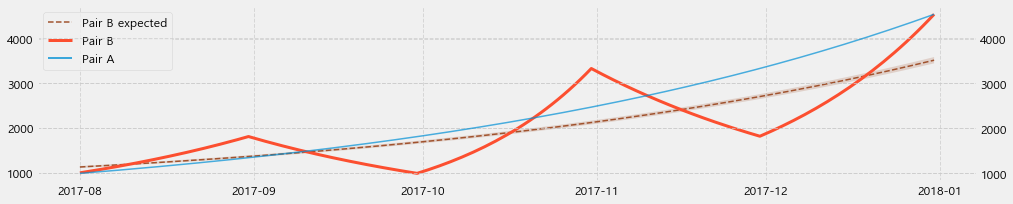

In [4]:
v.pair_trend_index_view(sample, threshold, pair, (15, 3))

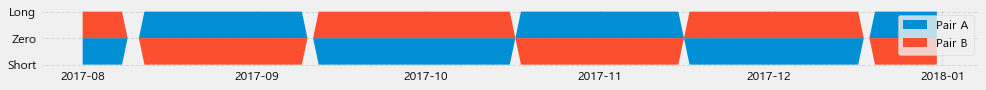

In [5]:
v.position_view(book, pair)

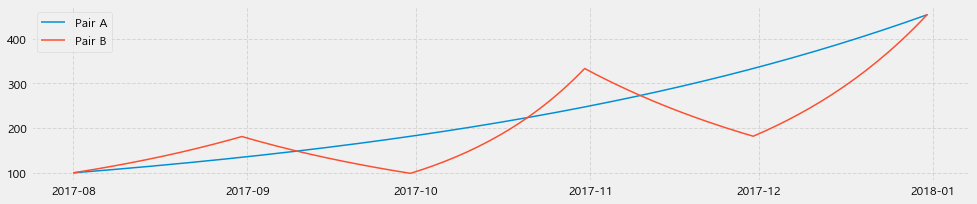

In [6]:
v.index_view(sample, base_date, pair, (15,3))